In [1]:
import pandas as pd
import time
import json
import requests 
import pprint
import datetime
from config import nomics_key
import matplotlib.pyplot as plt
import numpy as np


In [2]:
url = f"https://api.nomics.com/v1/currencies/ticker?key={nomics_key}&interval=365d&convert=EUR&per-page=100&page=1"
print(url)
# response = requests.get(url).json()


https://api.nomics.com/v1/currencies/ticker?key=6b04b40a48013819580bd1378033c2736fca4443&interval=365d&convert=EUR&per-page=100&page=1


In [3]:
url = f"https://api.nomics.com/v1/currencies/ticker?key={nomics_key}&interval=365d&convert=EUR&per-page=100&page=1"
response = requests.get(url).json()
name = []
price = []
rank = []
cap = []
high = []
ticker = []
year_price_change = []
year_pct_price_change = []
year_mktcap_change = []
year_pct_mktcap_change = []
set_index = 0
# For loop to retrieve data
for currency in response:
# Use try because not all data is complete
    try:
#       Retrieve each variable and save it in to the empty list
        name.append(response[set_index]["name"])
        ticker.append(response[set_index]['currency'])
        rank.append(response[set_index]['rank'])
        price.append(response[set_index]['price'])
        cap.append(response[set_index]['market_cap'])
        high.append(response[set_index]['high'])
    
        ypchange = response[set_index]['365d']['price_change']
        year_price_change.append(ypchange)
    
        yppchange = response[set_index]['365d']['price_change_pct']
        year_pct_price_change.append(yppchange)
    
        mpchange = response[set_index]['365d']["price_change"]
        year_mktcap_change.append(mpchange)
    
        mppchange = response[set_index]['365d']["price_change_pct"]
        year_pct_mktcap_change.append(mppchange)
        
# Add 1 to the index so it goes to the next currency
        set_index += 1
    
# Except to solve inexistent information, this information is a null
    except(KeyError):
        year_mktcap_change.append("")
        year_pct_mktcap_change.append("")
        set_index += 1
        
# Create new Data Frame with retrieved data
currency_df = pd.DataFrame({
    "Name": name,
    "Ticker": ticker,
    "Rank": rank,
    "Price": price,
    "Market Cap": cap,
    "High": high,
    "Year Price Change": year_price_change,
    "Year % Price Change": year_pct_price_change,
    "Year Market Cap Change": year_mktcap_change,
    "Year % Market Cap Change": year_pct_mktcap_change,})         


currency_df.style.format({"Price": "${:.2f}", 
                          "Market Cap": "${:.2f}", 
                          "High": "${:.2f}",
                          "Year Price Change":"${:}"})

currency_df.set_index('Name', inplace=True)
currency_df.head(10)

,Ticker,Rank,Price,Market Cap,High,Year Price Change,Year % Price Change,Year Market Cap Change,Year % Market Cap Change
Name,,,,,,,,,
Bitcoin,BTC,1,51345.10079587,969327778838,58438.00104652,35951.98465831,2.3356,35951.98465831,2.3356
Ethereum,ETH,2,3767.69570612,446171971133,4158.94587137,3299.83065779,7.0530,3299.83065779,7.0530
Binance Coin,BNB,3,515.13785664,86613752295,570.60879964,490.04089656,19.5259,490.04089656,19.5259
Tether,USDT,4,0.88816532,65669118553,0.97148261,0.050883511,0.0608,0.050883511,0.0608
Solana,SOL,5,185.29664414,56263940349,224.22321489,183.49638155,101.9276,183.49638155,101.9276
Cardano,ADA,6,1.66615107,53427451136,2.50098557,1.54422565,12.6653,1.54422565,12.6653
XRP,XRP,7,0.95053881,44826436026,2.28966108,0.57754016,1.5484,0.57754016,1.5484
Polkadot,DOT,8,35.80274373,37865226901,314.04863598,31.19677977,6.7731,31.19677977,6.7731
USD Coin,USDC,9,0.88777867,30591157885,0.93948316,0.053079919,0.0636,0.053079919,0.0636


In [5]:
currency_df['Price'] = currency_df['Price'].astype('float64')
currency_df['Rank'] = currency_df['Rank'].astype('int')
currency_df['Market Cap'] = currency_df['Market Cap'].astype('float64')
currency_df['High'] = currency_df['High'].astype('float64')
currency_df['Year Price Change'] = currency_df['Year Price Change'].astype('float64')
currency_df['Year % Price Change'] = currency_df['Year % Price Change'].astype('float64')
currency_df['Year Market Cap Change'] = currency_df['Year Market Cap Change'].astype('float64')
currency_df['Year % Market Cap Change'] = currency_df['Year % Market Cap Change'].astype('float64')

currency_df.to_csv("all_crypto_currency.csv", index=False, header=True)


In [6]:
top_price = currency_df['Price'].nlargest(n=5)
top_mCap = currency_df['Market Cap'].nlargest(n=5)
top_p_change = currency_df['Year Price Change'].nlargest(n=5)
top_pp_change = currency_df['Year % Price Change'].nlargest(n=5)
top_mc_change = currency_df['Year Market Cap Change'].nlargest(n=5)
top_mcp_change = currency_df['Year % Market Cap Change'].nlargest(n=5)

C:\Users\Tech\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


Text(0.5, 0, 'Currency')

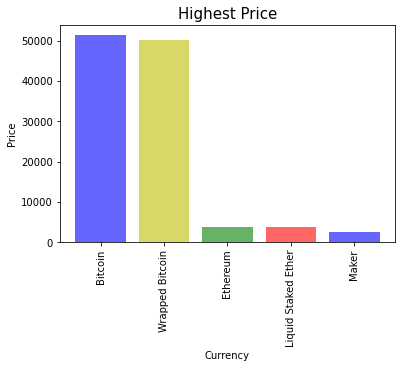

In [7]:
# Set variables to be charted
x_axis = top_price.index.values
y_axis = top_price.values
# Create bar chart
plt.bar(x_axis, y_axis, color='b''y''g''r', alpha=0.6, align="center",)
# Put title and labeles
plt.xticks(rotation='vertical')
plt.title("Highest Price", fontsize=15)
plt.ylabel("Price")
plt.xlabel("Currency")